<font color='steelblue' size=5><b>Комментарий ревьюера</b></font>

<font color='steelblue'>Привет, Артем! Меня зовут Михаил Костин, я буду проверять этот проект. Спасибо за проделанную работу! Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на "вы".</font>

<font color='steelblue'>Я буду использовать различные цвета и знаки, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='steelblue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='darkorange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание или что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).</font>

<font color='crimson'>❌ и красный текст - есть аспекты, с которыми принять проект в данной итерации не получится</font>

---

<font color='steelblue'>Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям - **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения.
Например, так: <b>Комментарий студента</b>

Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. 

<b>Давай смотреть, что получилось!</b></font> 

<div class="alert alert-info">
Привет, Михаил! Спасибо за содержательные комментарии, ниже оставил несколько своих вопросов,исправлений.
</div>

<font color='steelblue'><b>Комментарий ревьюера v2</b></font> - так я буду помечать комментарии во второй итерации

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

План работы:
1. Изучить общую информацию из датафрейма.
2. Провести предобработку данных:
    - проверить наличие пропусков и обработать их;
    - проверить наличие дубликатов и обработать их.
3. Разделить исходные данные на обучающую и валидационную выборки.
4. Построить модели линейной регрессии для полученных выборок и найти их точность.
5. Рассчитать достаточный объём сырья для безубыточной разработки новой скважины и сравнить его со средним запасом в каждом регионе.
6. Выбрать скважины с максимальными значениями предсказаний и рассчитать прибыль, получаемую с продажи сырья с выбранных скважин для каждого региона.
7. Посчитать риски и прибыль для каждого региона и на основе полученных результатов выбрать регион для разработки скважин.

## Загрузка и подготовка данных

In [170]:
#pip install nb_black

In [171]:
#%load_ext nb_black

In [172]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Хорошо, есть описание, импорты в одном месте.
</font>

Изучим данные.

In [173]:
df = [None] * 3

In [174]:
df[0] = pd.read_csv("geo_data_0.csv", sep=",")
df[0].head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [175]:
df[1] = pd.read_csv("geo_data_1.csv", sep=",")
df[1].head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [176]:
df[2] = pd.read_csv("geo_data_2.csv", sep=",")
df[2].head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


Видим, что в данных датафреймах признаки `f0`, `f1`, `f2` и целевой признак `product` являются количественными признаками.

In [177]:
df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [178]:
df[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [179]:
df[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Видим, что в данных датафреймах пропусков нет.

Проверим на дубликаты датафреймы df[0], df[1], df[2]. 

In [180]:
def duplicates_check(df):
    for i in range(0, 3):
        print(df[i].duplicated().sum())

In [181]:
duplicates_check(df)

0
0
0


Как видим, явных дубликатов в наших датафреймах нет.

Исследуем датафреймы на наличие неявных дубликатов.

Проверим, есть ли в df[0], df[1], df[2] скважины, уникальный идентификатор которых повторяется в одном датафрейме несколько раз.

In [182]:
def duplicates_repeat(df):
    for i in range(0, 3):
        print("Количество неявных дубликатов:", df[i]["id"].duplicated().sum())
        print(df[0][df[0].duplicated(subset=['id'])])
        print("Количество повторений неявных дубликатов:")
        print(df[i]["id"].value_counts().sort_values(ascending=False).head(11))
        print("")
        print("")

In [183]:
duplicates_repeat(df)

Количество неявных дубликатов: 10
          id        f0        f1         f2     product
7530   HZww2  1.061194 -0.373969  10.430210  158.828695
41724  bxg6G -0.823752  0.546319   3.630479   93.007798
51970  A5aEY -0.180335  0.935548  -2.094773   33.020205
63593  QcMuo  0.635635 -0.473422   0.862670   64.578675
66136  74z30  1.084962 -0.312358   6.990771  127.643327
69163  AGS9W -0.933795  0.116194  -3.655896   19.230453
75715  Tdehs  0.112079  0.430296   3.218993   60.964018
90815  fiKDv  0.049883  0.841313   6.394613  137.346586
92341  TtcGQ  0.110711  1.022689   0.911381  101.318008
97785  bsk9y  0.378429  0.005837   0.160827  160.637302
Количество повторений неявных дубликатов:
fiKDv    2
AGS9W    2
Tdehs    2
74z30    2
A5aEY    2
bsk9y    2
TtcGQ    2
HZww2    2
bxg6G    2
QcMuo    2
j9Oui    1
Name: id, dtype: int64


Количество неявных дубликатов: 4
          id        f0        f1         f2     product
7530   HZww2  1.061194 -0.373969  10.430210  158.828695
41724  bxg6G -0.8

Получили, что во всех трёх регионах есть скважины, для которых дважды указаны значения признаков `f0`, `f1`, `f2`. Это наблюдение говорит о том, что при измерении признаков для этих скважин были допущены ошибки. Количество таких скважин-дубликатов мало, поэтому их удаление не окажет сильного влияние на дальнейший анализ.

In [184]:
def delete_duplicates(df):
    for i in range(0, 3):
        l = df[i][df[i]["id"].duplicated()]["id"].tolist()
        df[i] = df[i][~df[i]["id"].isin(l)]
        print("Размер датафрейма после удаления дубликатов:", df[i].shape)

In [185]:
delete_duplicates(df)

Размер датафрейма после удаления дубликатов: (99980, 5)
Размер датафрейма после удаления дубликатов: (99992, 5)
Размер датафрейма после удаления дубликатов: (99992, 5)


<font color='steelblue'><b>Комментарий ревьюера: </b></font> ⚠️ <br>
<font color='darkorange'>
Хорошая работа по поиску дубликатов, но давай поглубже разберемся в проблеме. Сейчас мы видим, что, действительно, id совпадают в некоторых строках, но сами данные — абсолютно разные. Меня это приводит к выводу, что сломался лишь алгоритм именования скважин.
    
Но раз ты принял решение удалять (но лучше конечно без серьезных оснований не терять данные), то давай поправим этот процесс. Сейчас я вижу, что ты удалил вообще все дубликаты, а не только повторяющиеся значения.
    
Также, советую использовать встроенные функции pandas если это возможно. Зачастую они лаконичнее и быстрее работают. 
    
Например `df[1][df[1].duplicated(subset=['id'])]` - покажет тебе все уникальные дубликаты по id, причем по индексу они будут первыми встреченными, а `df[1][df[1].duplicated(subset=['id'], keep=False)]` покажет вообще все дублирующиеся строки по id. Для удаления также лучше пользоваться имеющимеся методами. `df[1].drop_duplicates(subset=['id'], keep='last')` удалит все повторные значения по id.
</font> 

<div class="alert alert-info">
Я понимаю, что возможно сломался только лишь алгоритм именования скважин, но все равно тогда надо было бы удалить одно из повторяющихся значений, только в таком случае непонятно, какое из двух в каждом случае нужно оставить, а какое удалить, поэтому принял решение, что такие скважины-дубликаты это брак измерений, и их дальше не учитываю. Встроенные функции pandas применил, спасибо за совет, буду далее их использовать.
</div>

<font color='steelblue'><b>Комментарий ревьюера v2: </b></font> ✔️ <br>
<font color='green'>
Хорошо, спасибо за аргументацию, согласен с тобой!
</font>

Удаление скважин-дубликатов прошло успешно.

Из датафреймов df[0], df[1], df[2] удалим столбец `id`, так как он неинформативен для дальнейшего анализа.

In [186]:
def drop_id(df):
    for i in range(0, 3):
        df[i].drop("id", axis=1, inplace=True)

In [187]:
drop_id(df)

In [188]:
df[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99980 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       99980 non-null  float64
 1   f1       99980 non-null  float64
 2   f2       99980 non-null  float64
 3   product  99980 non-null  float64
dtypes: float64(4)
memory usage: 3.8 MB


In [189]:
df[1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       99992 non-null  float64
 1   f1       99992 non-null  float64
 2   f2       99992 non-null  float64
 3   product  99992 non-null  float64
dtypes: float64(4)
memory usage: 3.8 MB


In [190]:
df[2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       99992 non-null  float64
 1   f1       99992 non-null  float64
 2   f2       99992 non-null  float64
 3   product  99992 non-null  float64
dtypes: float64(4)
memory usage: 3.8 MB


Как видим, удаление столбца `id` прошло успешно.

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Хорошо, id действительно бесполезен
</font> 

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ⚠️ <br>
<font color='darkorange'>
    Также хочу напомнить тебе, что по условиям задачи мы ограничены использованием только линейных моделей, а значит, может иметь место быть проблема [мультиколлинеарности](http://www.machinelearning.ru/wiki/index.php?title=Мультиколлинеарность). Хорошо бы было проверить это перед дальнейшими действиями.

Проверим, не наблюдается ли в наших данных мультиколлинеарность.

In [191]:
df[0][['f0','f1','f2']].corr()

,f0,f1,f2
f0,1.000000,-0.440724,-0.003204
f1,-0.440724,1.000000,0.001783
f2,-0.003204,0.001783,1.000000


array([[<AxesSubplot:xlabel='f0', ylabel='f0'>,
        <AxesSubplot:xlabel='f1', ylabel='f0'>,
        <AxesSubplot:xlabel='f2', ylabel='f0'>],
       [<AxesSubplot:xlabel='f0', ylabel='f1'>,
        <AxesSubplot:xlabel='f1', ylabel='f1'>,
        <AxesSubplot:xlabel='f2', ylabel='f1'>],
       [<AxesSubplot:xlabel='f0', ylabel='f2'>,
        <AxesSubplot:xlabel='f1', ylabel='f2'>,
        <AxesSubplot:xlabel='f2', ylabel='f2'>]], dtype=object)

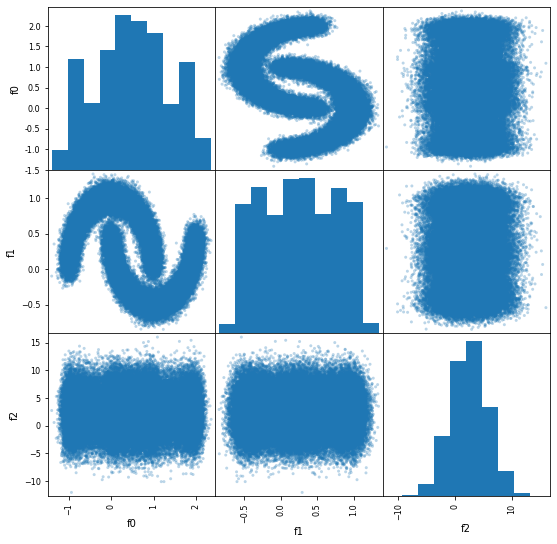

In [192]:
pd.plotting.scatter_matrix(df[0][['f0','f1','f2']], figsize=(9,9), alpha=0.3)

In [193]:
df[1][['f0','f1','f2']].corr()

,f0,f1,f2
f0,1.000000,0.182263,-0.001821
f1,0.182263,1.000000,-0.002608
f2,-0.001821,-0.002608,1.000000


array([[<AxesSubplot:xlabel='f0', ylabel='f0'>,
        <AxesSubplot:xlabel='f1', ylabel='f0'>,
        <AxesSubplot:xlabel='f2', ylabel='f0'>],
       [<AxesSubplot:xlabel='f0', ylabel='f1'>,
        <AxesSubplot:xlabel='f1', ylabel='f1'>,
        <AxesSubplot:xlabel='f2', ylabel='f1'>],
       [<AxesSubplot:xlabel='f0', ylabel='f2'>,
        <AxesSubplot:xlabel='f1', ylabel='f2'>,
        <AxesSubplot:xlabel='f2', ylabel='f2'>]], dtype=object)

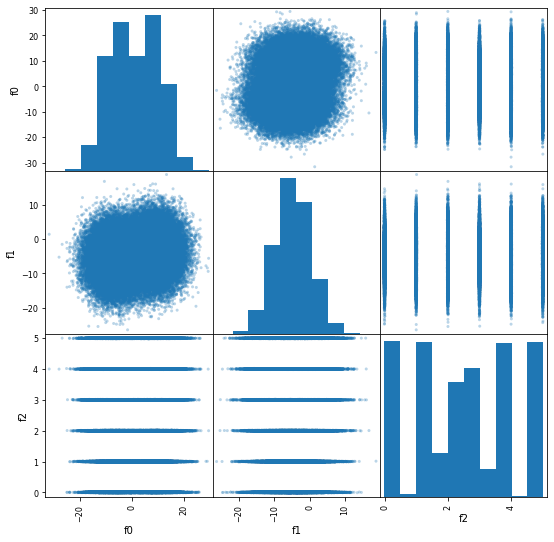

In [194]:
pd.plotting.scatter_matrix(df[1][['f0','f1','f2']], figsize=(9,9), alpha=0.3)

In [195]:
df[2][['f0','f1','f2']].corr()

,f0,f1,f2
f0,1.000000,0.000501,-0.000454
f1,0.000501,1.000000,0.000763
f2,-0.000454,0.000763,1.000000


array([[<AxesSubplot:xlabel='f0', ylabel='f0'>,
        <AxesSubplot:xlabel='f1', ylabel='f0'>,
        <AxesSubplot:xlabel='f2', ylabel='f0'>],
       [<AxesSubplot:xlabel='f0', ylabel='f1'>,
        <AxesSubplot:xlabel='f1', ylabel='f1'>,
        <AxesSubplot:xlabel='f2', ylabel='f1'>],
       [<AxesSubplot:xlabel='f0', ylabel='f2'>,
        <AxesSubplot:xlabel='f1', ylabel='f2'>,
        <AxesSubplot:xlabel='f2', ylabel='f2'>]], dtype=object)

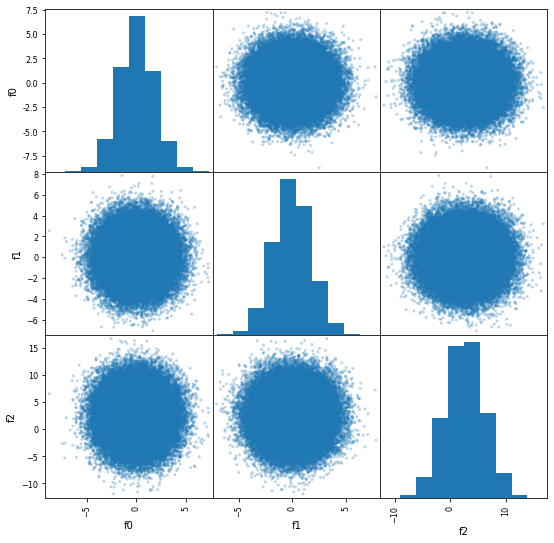

In [196]:
pd.plotting.scatter_matrix(df[2][['f0','f1','f2']], figsize=(9,9), alpha=0.3)

Из вида диаграмм рассеяния и коэффициентов корреляции Пирсона следует, что между признаками `f0`, `f1`, `f2` нет сильной линейной связи, поэтому, можно сказать, что мультиколлинеарность не наблюдается. 

<div class="alert alert-info">
Правильно ли я понимаю, что проверка на мультиколлинеарность означает проверку на то, что между признаками, на которых потом обучается модель нет сильной связи? Почему эта проверка важна именно для линейных моделей?
</div>

<font color='steelblue'><b>Комментарий ревьюера v2: </b></font> ✔️ <br>
<font color='green'>
Да, верно. Основная причина — неустойчивые коэф-ты при параметрах модели и то, что значения этих коэф-ов могут не совпадать с бизнес логикой. [Пример почему это плохо](https://habr.com/ru/company/akbarsdigital/blog/592493/#:~:text=%D0%BF%D1%80%D0%B8%D0%B2%D0%B5%D0%B4%D0%B5%D1%82%20%D0%BA%20%D0%BC%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8.-,%D0%9F%D0%BE%D1%87%D0%B5%D0%BC%D1%83%20%D1%8D%D1%82%D0%BE%20%D0%BF%D0%BB%D0%BE%D1%85%D0%BE%3F,-%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20%D0%BD%D0%B5%D0%B3%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%20%D0%B2%D0%BB%D0%B8%D1%8F%D0%B5%D1%82) и еще [Пример 2](http://www.faito.ru/ppt/mmep/kostunin/9.ppt) с точки зрения математики модели.

</font> 

## Обучение и проверка модели

Разделим исходные данные на две выборки: обучающая(75%) и валидационную(25%).
Признаки полученных выборок запишем в features_train[0] и features_valid[0], features_train[1] и features_valid[1], features_train[2] и features_valid[2].
Целевой признак запишем в target_train[0] и target_valid[0], target_train[1] и target_valid[1], target_train[2] и target_valid[2].

In [197]:
RANDOM_STATE = 12345

In [198]:
features = [None] * 3
target = [None] * 3
features_train = [None] * 3
features_valid = [None] * 3
target_train = [None] * 3
target_valid = [None] * 3

In [199]:
for i in range(0, 3):
    features[i] = df[i].drop("product", axis=1)
    target[i] = df[i]["product"]
    (
        features_train[i],
        features_valid[i],
        target_train[i],
        target_valid[i],
    ) = train_test_split(features[i], target[i], test_size=0.25, random_state=RANDOM_STATE)

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ⚠️ <br>
<font color='darkorange'>
Хорошая идея хранить все в одном списке списков, удобно и функционально.
    
Но будь аккуратнее с написанием функций, которые меняют передаваемые в них переменные. В том виде, в котором разделение на выборки организовано сейчас нет смысла в самой функции, ты также можешь запустить этот цикл и без нее. К тому же, повторный запуск ячейки не приведет к тому же результату, что совсем не всегда ожидаемо, принято писать функции, не меняющие окружения и возвращающие результат, который можно, например, сразу же и присвоить или добавить в нужный тебе список.
</font> 

<div class="alert alert-info">
То есть лучше использовать функции, которые будут возвращать значения, а не изменять передаваемые в них переменные внутри?
</div>

<font color='steelblue'><b>Комментарий ревьюера v2: </b></font> ✔️ <br>
<font color='green'>
Да, это считается хорошим тоном и уменьшает возможные ошибки из-за неочевидных изменений глобальных переменных.
</font> 

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ❌ <br>
<font color='crimson'>
Напоминаю тебе, что при использовании линейных моделей действительно важно масштабировать признаки. 

Приведение значений признаков к одному диапазону ускорит схождение весов при использовании градиентного спуска. Также признаки с наибольшими абсолютными значениями будут вынуждать модель использовать большие, нестабильные коэф-ты. Подробнее можешь прочесть [тут](https://itchef.ru/articles/42114/)
</font>

<font color='steelblue'><b>Комментарий ревьюера v2: </b></font> ✔️ <br>
<font color='green'>
Отлично, верное применение скалера
</font> 

Полученные выборки имеют следующие размеры:

In [200]:
def sizes(df, features_train, features_valid, target_train, target_valid):
    for i in range(0, 3):
        print("Размеры обучающей выборки:")
        print(features_train[i].shape)
        print(target_train[i].shape)
        print("Размеры валидационной выборки:")
        print(features_valid[i].shape)
        print(target_valid[i].shape)
        print("Размеры датафрейма:")
        print(df[i].shape)
        print("")

In [201]:
sizes(df, features_train, features_valid, target_train, target_valid)

Размеры обучающей выборки:
(74985, 3)
(74985,)
Размеры валидационной выборки:
(24995, 3)
(24995,)
Размеры датафрейма:
(99980, 4)

Размеры обучающей выборки:
(74994, 3)
(74994,)
Размеры валидационной выборки:
(24998, 3)
(24998,)
Размеры датафрейма:
(99992, 4)

Размеры обучающей выборки:
(74994, 3)
(74994,)
Размеры валидационной выборки:
(24998, 3)
(24998,)
Размеры датафрейма:
(99992, 4)



Видим по количеству строк в каждой выборке, что разделение проведено правильно.

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Здорово что проверяешь результаты своих действий, это очень полезно
</font> 

<div class="alert alert-info">
Проведем масштабирование количественных признаков `f0`, `f1`, `f2`.
</div>

In [202]:
features_train[0].head()

,f0,f1,f2
86213,0.245635,0.128953,2.753394
50779,0.463011,0.891989,3.742645
84513,0.340691,-0.148729,4.693089
43384,-0.291562,1.111994,1.345046
69540,-0.453448,0.885378,6.621671


In [203]:
numeric = ["f0", "f1", "f2"]
for i in range(0, 3):
    scaler = StandardScaler()
    scaler.fit(features_train[i][numeric])
    pd.options.mode.chained_assignment = None
    features_train[i][numeric] = scaler.transform(features_train[i][numeric])
    features_valid[i][numeric] = scaler.transform(features_valid[i][numeric])

In [204]:
features_train[0].head()

,f0,f1,f2
86213,-0.292870,-0.240168,0.076072
50779,-0.043473,1.272620,0.380802
84513,-0.183812,-0.790696,0.673579
43384,-0.909198,1.708799,-0.357759
69540,-1.094931,1.259513,1.267664


Видим, что масштабирование признаков прошло успешно.

Получим предсказания на валидационных выборках, используя модель линейной регрессии.

In [205]:
model = [None] * 3
predictions_valid = [None] * 3
result = [None] * 3
predict_mean = [None] * 3

In [206]:
def predictions(
    model,
    features_train,
    features_valid,
    target_train,
    target_valid,
    predictions_valid,
    result,
    predict_mean,
):
    for i in range(0, 3):
        model[i] = LinearRegression()
        model[i].fit(features_train[i], target_train[i])
        predictions_valid[i] = model[i].predict(features_valid[i])
        result[i] = mean_squared_error(target_valid[i], predictions_valid[i]) ** 0.5
        predict_mean[i] = predictions_valid[i].mean()
        print("Средний запас предсказанного сырья:", predict_mean[i])
        print("RMSE модели линейной регрессии на валидационной выборке:", result[i])
        print("")

In [207]:
predictions(
    model,
    features_train,
    features_valid,
    target_train,
    target_valid,
    predictions_valid,
    result,
    predict_mean,
)

Средний запас предсказанного сырья: 92.42384109947358
RMSE модели линейной регрессии на валидационной выборке: 37.716904960382735

Средний запас предсказанного сырья: 68.98311857983121
RMSE модели линейной регрессии на валидационной выборке: 0.8914901390348532

Средний запас предсказанного сырья: 95.11622302076478
RMSE модели линейной регрессии на валидационной выборке: 39.975543264382345



Из полученных результатов можно сделать вывод, что модель линейной регрессии показала лучшую точность на валидационных данных второго региона. Это означает, что запасы сырья во втором регионе линейно зависят от полученных значений признаков, поэтому, используя модель линейной регрессии, можно получить значения среднего запаса сырья во втором регионе наиболее близкие к реальным.

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ⚠️ <br>
<font color='darkorange'>
Действительно так, но хотелось бы услышать развернутый вывод, полезный бизнесу, что ты можешь сказать по поводу задачи получив такие результаты?
 
</font> 

<div class="alert alert-info">
Подправил вывод, как смог, но честно говоря, не очень понимаю, какой вывод для бизнеса мы должны сделать для этого пункта.
</div>

<font color='steelblue'><b>Комментарий ревьюера v2: </b></font> ✔️ <br>
<font color='green'>
Все хорошо, скорее мы должны не выдать какой-то ответ, а наоборот, захотели бы задать вопрос, почему такая большая разница в полученных метриках на разных регионах? Может сбой оборудования или разные методы снятия данных? Тем более мы увидели, что данные по региону 2 будто менее дискретизированы ("собраны" в столбцы по сравнению с регионами 1 и 3). 
    
Сейчас мы принимаем это как данность, но вопрос действительно стоящий внимания и для избежания ошибок в производстве лучше разъяснить с заказчиком.
</font> 

## Подготовка к расчёту прибыли

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины в каждом регионе. Для этого введем несколько новых величин.

In [208]:
BUDGET = 10000
POINTS_PER_BUDGET = 200
PRODUCT_PRICE = 0.45
print("Бюджет на разработку скважин в регионе в млн рублей:", BUDGET)
print("Количество разрабатываемых скважин в регионе:", POINTS_PER_BUDGET)
print("Доходность одной единицы продукта в млн. рублей:", PRODUCT_PRICE)

Бюджет на разработку скважин в регионе в млн рублей: 10000
Количество разрабатываемых скважин в регионе: 200
Доходность одной единицы продукта в млн. рублей: 0.45


<font color='steelblue'><b>Комментарий ревьюера: </b></font> ⚠️ <br>
<font color='darkorange'>
Все хорошо, но хочу обратить внимание на названия констант - по PEP-8 название констант записываются в верхнем регистре ([подробнее](https://peps.python.org/pep-0008/#constants)).
    
Также, для записи больших чисел, для более удобного чтения и чтобы не запутаться в нулях, можно использовать такую запись: 1_000_000 или возведение в степень числа 10.

<font color='steelblue'><b>Комментарий ревьюера v2: </b></font> ✔️ <br>
<font color='green'>
👍 
</font> 

Рассчитаем бюджет одной скважины на разработку.

In [209]:
budget_per_point = BUDGET / POINTS_PER_BUDGET
budget_per_point

50.0

Получим достаточный объём сырья для безубыточной разработки новой скважины.

In [210]:
product_value_point = budget_per_point / PRODUCT_PRICE
product_value_point

111.11111111111111

Сравним полученный объём сырья со средним запасом в каждом регионе. Для этого найдем среднее значение столбца `product` для каждого региона.

In [211]:
def mean_product(df):
    for i in range(0, 3):
        print(df[i]["product"].mean())

In [212]:
mean_product(df)

92.49916597893423
68.82414772667734
94.9987668676812


Получили, что средние значения объемов запасов в скважинах в трех регионах меньше значения, нужного для окупаемости, поэтому можно сделать вывод, что существует риск, что разработка новой скважины в каждом регионе будет убыточной.

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Совершенно верно! Средние значения говорят, что большинство скважин нам не подходит, поэтому мы и разрабатываем нашу модель — без нее наугад ничего не получится.
</font>

## Расчёт прибыли и рисков 

Напишем функцию, которая будет выбирать скважины с максимальными значениями предсказаний и рассчитывать прибыль, получаемую с продажи сырья с выбранных скважин.

In [216]:
def profit(predictions_valid, target_valid):
    predictions_valid = pd.Series(predictions_valid)
    predictions_valid_sorted = predictions_valid.sort_values(ascending=False)
    selected = target_valid.reset_index(drop=True)[predictions_valid_sorted.index][:POINTS_PER_BUDGET]
    profit = selected.sum() * PRODUCT_PRICE - BUDGET
    return profit

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Все верно, согласен
</font> 

Создадим функцию для расчета средней прибыли, 95%-го доверительного интервала и рисков убытков для отдельно взятого региона.

In [217]:
def analysis_for_region(predictions_valid, target_valid):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        target_valid = pd.Series(target_valid.reset_index(drop=True))
        target_subsample = target_valid.sample(n=500, replace=False, random_state=state)
        probs_subsample = predictions_valid[target_subsample.index]
        profit_boot = profit(probs_subsample, target_subsample)
        values.append(profit_boot)
 
    values = pd.Series(values)
 
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    risk = (values < 0).mean()*100
 
    print("Средняя прибыль:", values.mean())
    print('95%-ый доверительный интервал:', '(', lower, ',', upper, ')')
    print("Риск убытков: {0:.2f}".format(risk), '%')

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Супер! Верная и красивая реализация Bootstrap.
</font>

Применим данную функцию к каждому региону.

In [218]:
analysis_for_region(predictions_valid[0], target_valid[0])

Средняя прибыль: 425.26541327380727
95%-ый доверительный интервал: ( -61.7416550064056 , 921.1533789085469 )
Риск убытков: 4.40 %


In [219]:
analysis_for_region(predictions_valid[1], target_valid[1])

Средняя прибыль: 467.7351290283165
95%-ый доверительный интервал: ( 87.39167069499786 , 875.8911805546909 )
Риск убытков: 0.60 %


In [220]:
analysis_for_region(predictions_valid[2], target_valid[2])

Средняя прибыль: 337.78428564193615
95%-ый доверительный интервал: ( -176.46829648007827 , 842.5852914748815 )
Риск убытков: 9.00 %


Таким образом, получаем, что только во втором регионе вероятность убытков меньше 2.5%, поэтому следует выбрать данный регион для разработки скважин.

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Отлично, согласен с выводами
    
Хотелось бы услышать твои предложения/вопросы к заказчику. Сейчас ты получил результаты, но у тебя могут и должны возникнуть вопросы по странностям данных или условий. Что можно улучшить и с чем придется смириться из-за этого заказчику?
</font> 

<div class="alert alert-info">
Из полученных результатов также следует, что для первого и второго региона нижний квантиль находится левее границы безубыточности, то есть существует достаточно большой риск, что новая скважина в этих регионах будет убыточной. Еще стоит заметить, что существует достаточно большой разброс значений прибыли скважин в каждом регионе. На что еще следует обратить внимание?
</div>

<font color='steelblue'><b>Комментарий ревьюера v2: </b></font> ✔️ <br>
<font color='green'>
Хороший вывод. Еще на что можно обратить внимание это отличие данных во 2 регионе от остальных (описал в комментарии ранее). Скорее всего это главный вопрос. Можно предложить реализовать другие модели или пересмотреть требования по части рисков.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован

<font color='steelblue'><b>Итоговый комментарий ревьюера</b></font>

<font color='steelblue'>Артем, в твоем проекте много хороших решений, код — достаточно лаконичный. Однако еще есть нюансы которые придется поправить (Минимум — Красные комментарии, а если хочешь прокачать проект — можно еще и часть желтых). Также хотелось бы видеть больше твоих мыслей и рассуждений по ходу выполнения работы, более развернутые выводы, обращать больше внимания на анализ данных.
   
<font color='steelblue'>Надеюсь, комментарии помогут закончить проект. Постараюсь повторно проверить твой проект как можно быстрее. Если у тебя появятся вопросы — задавай, я постараюсь ответить.
</font>

<font color='steelblue'><b>Итоговый комментарий ревьюера v2</b></font><br>

<font color='steelblue'>Твой проект готов :) Надеюсь, тебе понравился процесс выполнения и результат.
    
       
Ты проделал большую работу и я рад, чт ополучилось еще немного прокачать твой проект. Надеюсь мои комментарии помогут тебе в будущих работах.
  <br>  